In [1]:
# !pip install mglearn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

## PCA

In [3]:
# 유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

유방암 데이터는 30개의 feature를 가지고 있다.

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 데이터 전처리

- 차원 축소를 하기에 앞서 Xfeature들 간의 단위 차이가 조정되어야 함 -> scaling

In [6]:
# 평균0, 분산 1을 갖도록 X_feature scaling: 여러 Scaler들 중 하나
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)

data = scaler.transform(cancer.data)

### 모델링

In [7]:
from sklearn.decomposition import PCA

#주성분 개수 2개
pca = PCA(n_components=2)

#pca 모델 학습: X_data만 필요
pca.fit(data)

#학습도니 pca 모델을 이용해 data 변환: 차원 축소
data_pca = pca.transform(data)

print(f'원본데이터 형태 : {data.shape}')
print(f'축소된 데이터 형태 : {data_pca.shape}')

원본데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


In [8]:
print(f'PCA component 별 변동성 {pca.explained_variance_ratio_}')

PCA component 별 변동성 [0.44272026 0.18971182]


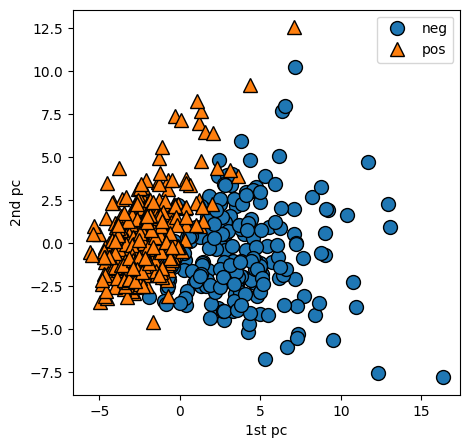

In [9]:
#차원 축소의 결과 시각화
plt.figure(figsize=(5,5))
mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], cancer.target)

#범례추가(loc(위치) = 0, 1, 2, 3, best)
plt.xlabel('1st pc')
plt.ylabel('2nd pc')
plt.legend(['neg', 'pos'], loc='best')
plt.show()

주성분은 원본 feature들의 조합으로 표현할 수 있다.
그렇다면 어떻게 조합되었을까?

In [20]:
print(pca.components_[0], pca.components_[1], sep='\n\n')

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


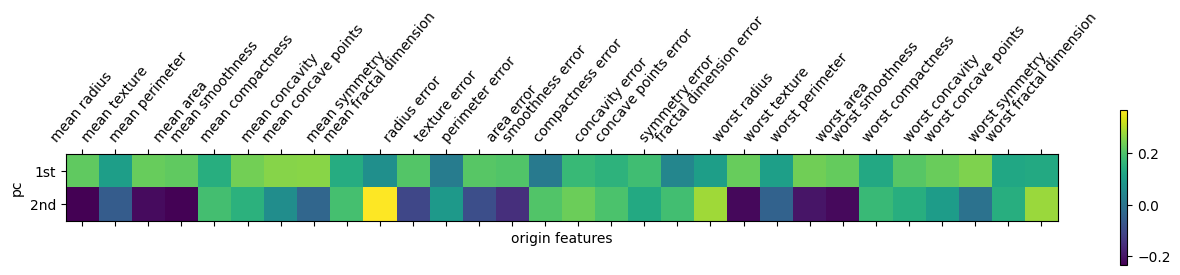

In [23]:
#w 주성분1과 주성분2가 각각 어느정도 데이터를 반영하고 있는가 >> 시각화
plt.matshow(pca.components_, cmap='viridis')  # heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=50)  # 회전
plt.yticks([0,1], ['1st', '2nd'])

plt.xlabel('origin features')
plt.ylabel('pc')

plt.colorbar()
plt.show()

In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=42)
scores = cross_val_score(rcf, data_pca, cancer.target, scoring='accuracy', cv=3)

print('PCA를 사용한 경우')
print(f'cv=3 인 경우 개별 flod 세트별 정확도 {scores}')
print(f'평균 정확도 {np.mean(scores):.4f}')

PCA를 사용한 경우
cv=3 인 경우 개별 flod 세트별 정확도 [0.92105263 0.94210526 0.93121693]
평균 정확도 0.9315


In [26]:
rcf1 = RandomForestClassifier(n_estimators=300, random_state=156)
scores1 = cross_val_score(rcf1, data, cancer.target, scoring='accuracy', cv=3)

# 데이터 스케일링

print('PCA를 사용하지 않은 경우')
print(f'cv=3 인 경우 개별 flod 세트별 정확도 {scores1}')
print(f'평균 정확도 {np.mean(scores1):.4f}')

PCA를 사용하지 않은 경우
cv=3 인 경우 개별 flod 세트별 정확도 [0.94210526 0.97368421 0.96296296]
평균 정확도 0.9596


<Figure size 1500x1500 with 0 Axes>

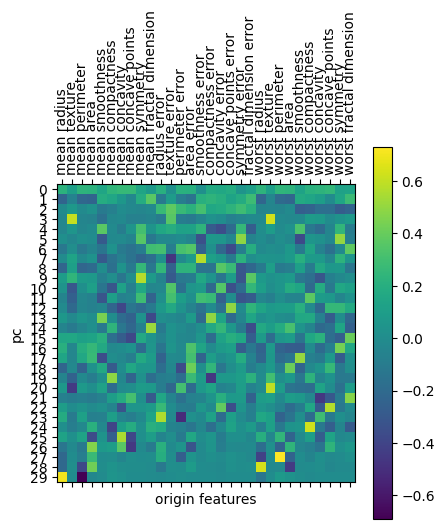

PCA를 사용한 경우
cv=3 인 경우 개별 flod 세트별 정확도 [0.91052632 0.93157895 0.9047619 ]
평균 정확도 0.9156
PCA를 사용 안한 경우
cv=3 인 경우 개별 flod 세트별 정확도 [0.94210526 0.97368421 0.96296296]
평균 정확도 0.9596


In [32]:
data_scaled = data

### PCA : 주성분 30개
pca = PCA(n_components=30)
data_pca_30 = pca.fit_transform(data_scaled)

# 주성분 30개 (원래 데이터 feature 개수도 30개)
pc_comp = pca.components_
pc_comp.shape

plt.figure(figsize=(15,15))
plt.matshow(pca.components_, cmap='viridis')

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.yticks(range(30))

plt.xlabel('origin features')
plt.ylabel('pc')

plt.colorbar()
plt.show()

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_pca_30, cancer.target, scoring='accuracy', cv=3)
print('PCA를 사용한 경우')
print(f'cv=3 인 경우 개별 flod 세트별 정확도 {scores}')
print(f'평균 정확도 {np.mean(scores):.4f}')


rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_scaled, cancer.target, scoring='accuracy', cv=3)
print('PCA를 사용 안한 경우')
print(f'cv=3 인 경우 개별 flod 세트별 정확도 {scores}')
print(f'평균 정확도 {np.mean(scores):.4f}')


### 주성분 개수 결정하기

In [34]:
# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(cancer.data)
data_scaled = scaler.transform(cancer.data)

In [35]:
# 전체 데이터에 PCA 데이터 적용
pca = PCA()
X_pca = pca.fit_transform(data_scaled)

In [36]:
# 3. 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [37]:
cumulative_variance_ratio

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

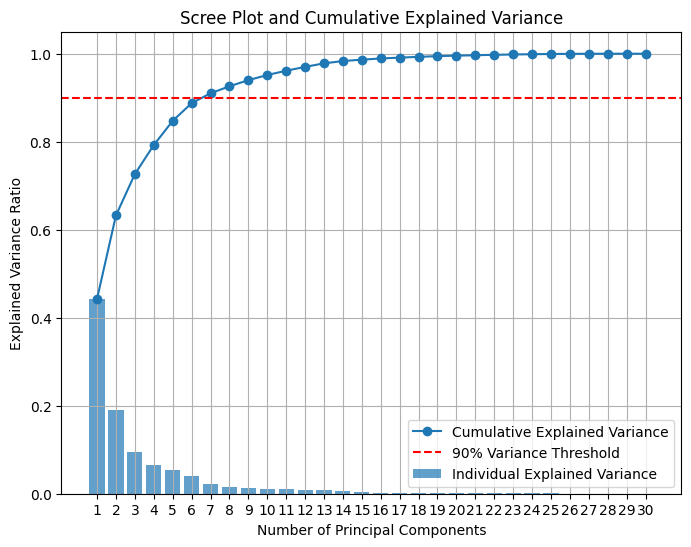

In [41]:
# 4. Plot 그리기
plt.figure(figsize=(8,6))

plt.plot(range(1, len(explained_variance_ratio) + 1),
         cumulative_variance_ratio, 
         marker='o', 
         label='Cumulative Explained Variance')
plt.bar(range(1, len(explained_variance_ratio) + 1), 
        explained_variance_ratio, 
        alpha=0.7, 
        label='Individual Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')

plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

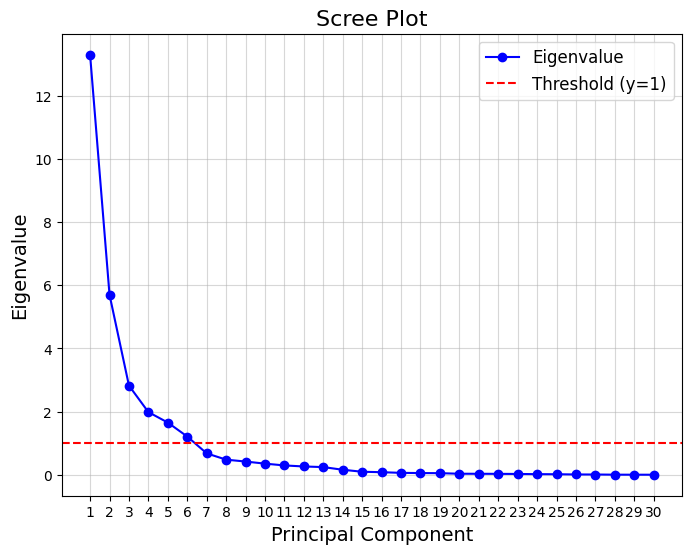

Explained Variance Ratio (각 주성분의 분산 비율):
  주성분 1: 0.4427
  주성분 2: 0.1897
  주성분 3: 0.0939
  주성분 4: 0.0660
  주성분 5: 0.0550
  주성분 6: 0.0402
  주성분 7: 0.0225
  주성분 8: 0.0159
  주성분 9: 0.0139
  주성분 10: 0.0117
  주성분 11: 0.0098
  주성분 12: 0.0087
  주성분 13: 0.0080
  주성분 14: 0.0052
  주성분 15: 0.0031
  주성분 16: 0.0027
  주성분 17: 0.0020
  주성분 18: 0.0018
  주성분 19: 0.0016
  주성분 20: 0.0010
  주성분 21: 0.0010
  주성분 22: 0.0009
  주성분 23: 0.0008
  주성분 24: 0.0006
  주성분 25: 0.0005
  주성분 26: 0.0003
  주성분 27: 0.0002
  주성분 28: 0.0001
  주성분 29: 0.0000
  주성분 30: 0.0000


In [43]:
explained_variance = pca.explained_variance_  # 각 주성분의 고유값
explained_variance_ratio = pca.explained_variance_ratio_  # 분산 비율

# 4. Scree Plot 생성
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), 
         explained_variance, 
         marker='o', 
         linestyle='-', 
         color='blue', 
         label='Eigenvalue')
plt.axhline(y=1, color='red', linestyle='--', label='Threshold (y=1)')  # 임계선 (고유값=1)

plt.title('Scree Plot', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 5. Explained Variance Ratio 출력
print("Explained Variance Ratio (각 주성분의 분산 비율):")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"  주성분 {i}: {ratio:.4f}")

### PCA : 주성분 6개

In [67]:
pca = PCA(n_components=6)
data_pca_6 = pca.fit_transform(data_scaled)

In [68]:
data_pca_6.shape

(569, 6)

In [69]:
pc_comp = pca.components_
pc_comp.shape

(6, 30)

In [70]:
for pc in pca.explained_variance_ratio_:
    print(f'PCA Component 별 변동성 : {pc:.4f}')

PCA Component 별 변동성 : 0.4427
PCA Component 별 변동성 : 0.1897
PCA Component 별 변동성 : 0.0939
PCA Component 별 변동성 : 0.0660
PCA Component 별 변동성 : 0.0550
PCA Component 별 변동성 : 0.0402


In [71]:
sum(pca.explained_variance_ratio_)

np.float64(0.887587963566906)

<Figure size 1500x1500 with 0 Axes>

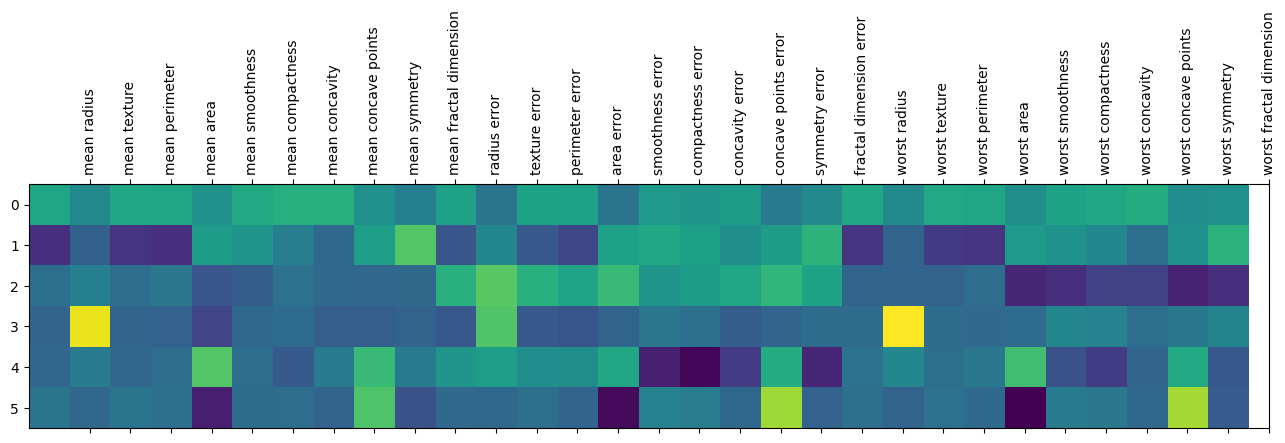

In [72]:
plt.figure(figsize=(15,15))
plt.matshow(pca.components_, cmap='viridis')

plt.xticks(range(1, len(cancer.feature_names)+1), 
           cancer.feature_names,
           rotation=90)

plt.show()

In [73]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_pca_6, cancer.target, scoring='accuracy', cv=3 )
print("PCA를 한 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, data_scaled, cancer.target, scoring='accuracy', cv=3 )
print("PCA를 하지 않은 데이터의 결과")
print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

PCA를 한 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.95263158 0.96315789 0.93121693]
평균 정확도:0.9490
PCA를 하지 않은 데이터의 결과
CV=3 인 경우의 개별 Fold세트별 정확도: [0.94210526 0.97368421 0.96296296]
평균 정확도:0.9596


# 실습

###  데이터 전처리

### PCA 실행 - 주성분2개

In [18]:

# font 정의

# 시각화
